In [2]:
image = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/frames/0_0.png'

In [2]:
import easyocr
import sys
reader = easyocr.Reader(['en'])
sys.path.append('/home/jessica/reading-kiln-termostat/src')
from pathlib import Path

import cv2 
import os
import pathlib
import matplotlib.pyplot as plt 
import numpy as np
import InputReader
import PreProcesser
import CurveCreator

input_reader = InputReader.InputReader()
prep = PreProcesser.PreProcesser()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [2]:
image = cv2.imread('/home/jessica/reading-kiln-termostat/data/recordings/29-08-2024-esmalte/processed/cropped_datetime/1191_2024-08-29_23:16:56.png')

In [16]:
image = cv2.imread('/home/jessica/reading-kiln-termostat/data/recordings/10-10-2023-esmalte/frames/2_60.png')
reader.readtext(image)

[([[45, 49], [295, 49], [295, 93], [45, 93]],
  '2023-10-10',
  0.9999243021820284),
 ([[309, 49], [509, 49], [509, 93], [309, 93]],
  '16: 09: 39',
  0.6809505284103134),
 ([[668, 464], [758, 464], [758, 512], [668, 512]], '169', 0.8296948761274455),
 ([[473, 579], [605, 579], [605, 639], [473, 639]], 'STECNo', 0.5459188176112),
 ([[857, 619], [915, 619], [915, 659], [857, 659]], 'SS', 0.9689484746003494),
 ([[263, 813], [325, 813], [325, 844], [263, 844]],
  'Bprxk',
  0.1310935902102271),
 ([[271.51341170750567, 845.6620705367551],
   [313.6641005886757, 837.8905996075496],
   [317.48658829249433, 857.3379294632449],
   [274.3358994113243, 864.1094003924504]],
  'Nee',
  0.7014539241790771)]

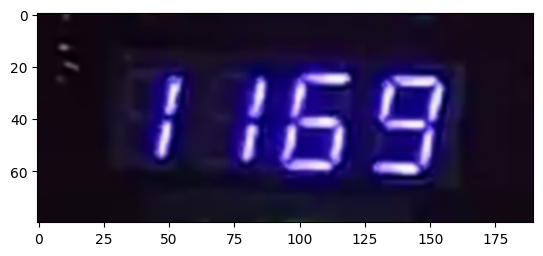

In [19]:
plt.imshow(image[445:525, 600:790], cmap = 'gray', interpolation = 'bicubic')

In [2]:
rede = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/cropped_datetime/2023-09-04_17:00:59.png'
redb = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/cropped_datetime/2023-09-04_17:40:43.png'
whiteb = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/cropped_datetime/2023-09-04_18:17:41.png'
whiter = '/home/jessica/reading-kiln-termostat/data/processed_recordings/16-04-2024-esmalte/cropped_datetime/2024-04-16_22:37:12.png'
white = '/home/jessica/reading-kiln-termostat/data/processed_recordings/01-08-2024-esmalte/cropped_datetime/2024-08-01_23:02:00.png'
white_2 = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-04-2024-esmalte/cropped_datetime/2024-04-04_22:01:32.png'
white_r2 = '/home/jessica/reading-kiln-termostat/data/processed_recordings/16-04-2024-esmalte/cropped_datetime/2024-04-16_22:40:12.png'
exp = '/home/jessica/reading-kiln-termostat/data/processed_recordings/29-08-2023-esmalte/prediction_frames/2023-08-29_16:43:44_1159.png'

235


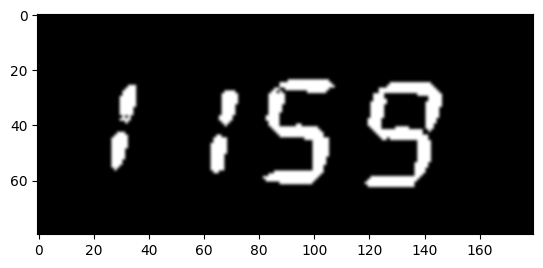

[[[[18, 16], [152, 16], [152, 70], [18, 70]], '1159']]
18.310416666666665
87


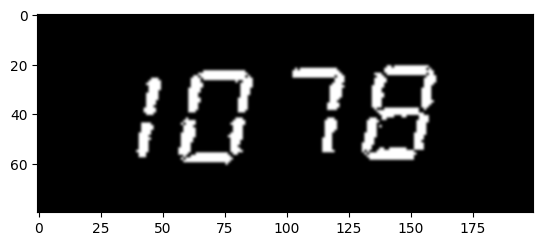

[[[[32, 14], [168, 14], [168, 66], [32, 66]], '1078']]
18.3759375
235


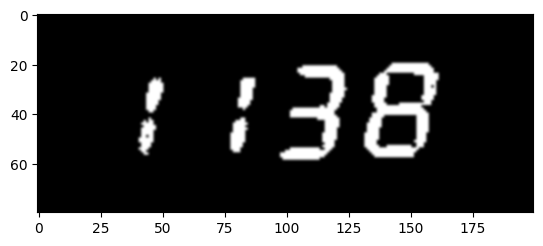

[[[[64, 9], [171, 9], [171, 72], [64, 72]], '138']]
18.2803125
235


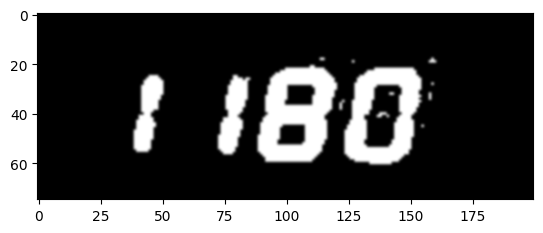

[[[[35, 14], [164, 14], [164, 70], [35, 70]], '1 180']]
33.609
247


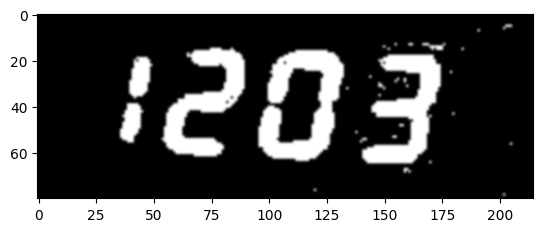

[[[[24, 4], [184, 4], [184, 76], [24, 76]], '1203']]
39.79186046511628
235


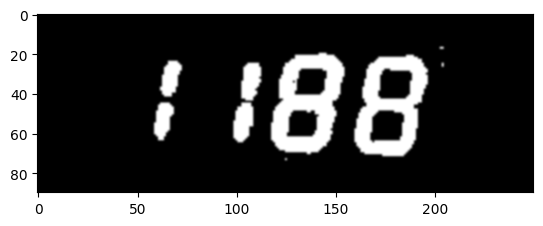

[[[[49, 15], [203, 15], [203, 81], [49, 81]], '1888']]
30.044666666666668
235


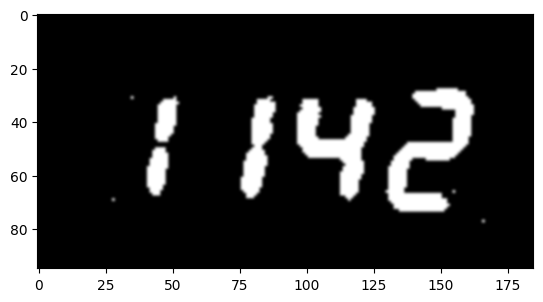

[[[[31, 19], [171, 19], [171, 83], [31, 83]], '1042']]
22.779516358463727
251


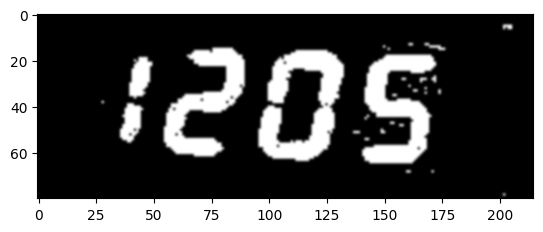

[[[[22, 4], [182, 4], [182, 76], [22, 76]], '1285']]
39.332267441860466


In [6]:
images = [exp, rede, redb, whiteb, whiter, white, white_2, white_r2]
for image in images:
    img = cv2.imread(image)
    mask = (prep.find_best_mask(img))
    print(mask)
    masked = prep.grey_mask(img, mask)
    plt.imshow(masked, cmap = 'gray', interpolation = 'bicubic')
    plt.show()
    ocr  = reader.readtext(masked, allowlist='0123456789', paragraph = True)
    print(ocr)
    print(prep.average_brightness(masked))

In [4]:
def white_mask(image, lower):
    lower_white = np.array(lower, dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to filter out white pixels
    mask = cv2.inRange(image, lower_white, upper_white)

    # Optionally, apply the mask to the original image to extract only white areas
    return cv2.bitwise_and(image, image, mask=mask)

In [12]:
image = cv2.imread('/home/jessica/reading-kiln-termostat/data/recordings/test_results/white_best_mask/29-08-2024-esmalte/prediction_frames/2024-08-29_23:16:56_1198_8494.png')
print(prep.average_brightness(image))


22.85567813108371


14.112472420506165


[[[[146, 28], [318, 28], [318, 102], [146, 102]], '1191']]

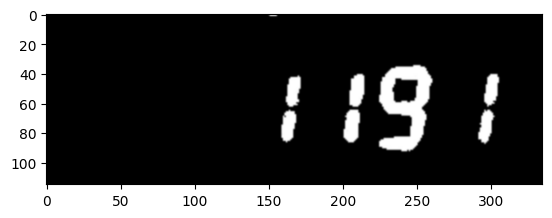

In [10]:
# o_1173 = cv2.imread('/home/jessica/reading-kiln-termostat/data/processed_recordings/29-08-2024-esmalte/cropped_datetime/2024-08-29_22:53:56.png')
# img = cv2.cvtColor(o_1173, cv2.COLOR_BGR2GRAY)
# _, threshold_image = cv2.threshold(o_1173, 225, 255, cv2.THRESH_BINARY)
masked = white_mask(image, [240, 240, 240])
plt.imshow(masked, cmap = 'gray', interpolation = 'bicubic')
print(prep.average_brightness(masked))
reader.readtext(masked, allowlist='0123456789', paragraph = True)

[]

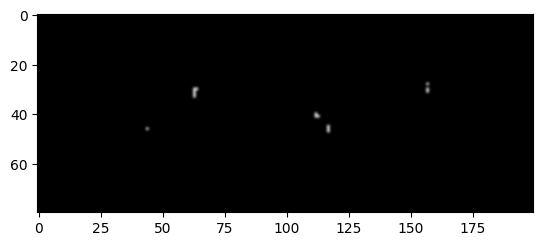

In [29]:
masked = white_mask(cv2.imread(red0), [235, 235, 235])
plt.imshow(masked, cmap = 'gray', interpolation = 'bicubic')

reader.readtext(masked, allowlist='0123456789', paragraph = True)

In [11]:
len(cv2.imread(whiteb).shape)

3

In [3]:
self.prep.grey_mask(image, lower_threshold = 235)


UnboundLocalError: local variable 'mask' referenced before assignment

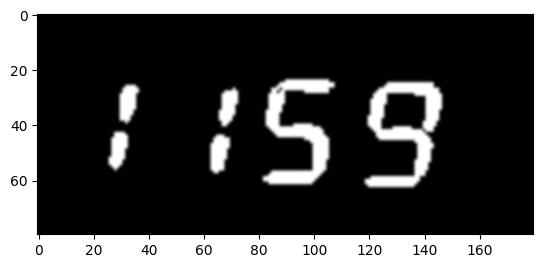

[[[[18, 16], [154, 16], [154, 72], [18, 72]], '1159']]
19.975


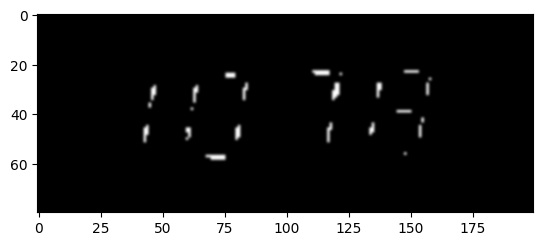

[]
2.518125


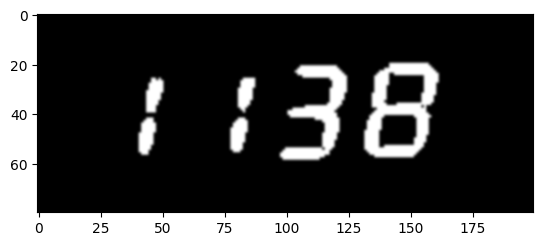

[[[[36, 12], [166, 12], [166, 66], [36, 66]], '1 138']]
20.145


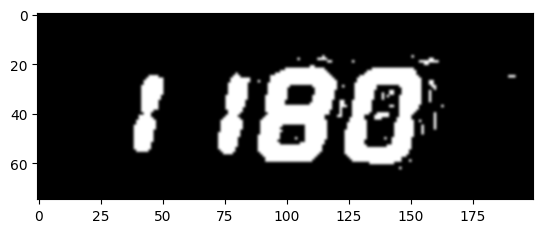

[[[[39, 16], [164, 16], [164, 70], [39, 70]], '1 180']]
35.496


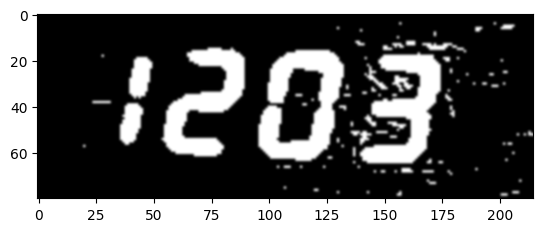

[[[[15, 9], [183, 9], [183, 73], [15, 73]], '4203']]
45.440406976744185


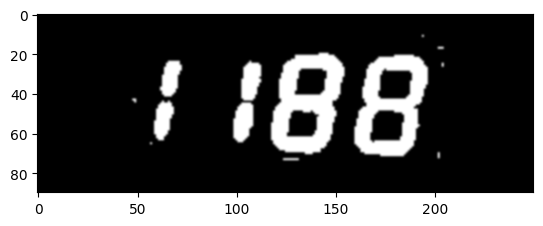

[[[[49, 15], [205, 15], [205, 81], [49, 81]], '1188']]
30.917333333333332


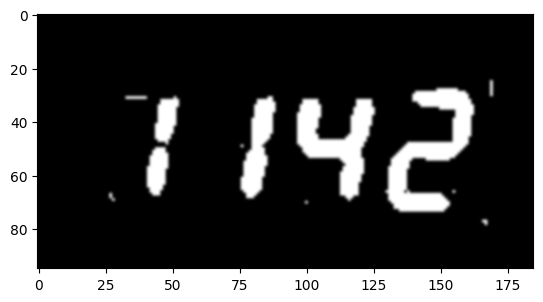

[[[[25, 19], [173, 19], [173, 83], [25, 83]], '7142']]
23.5049786628734


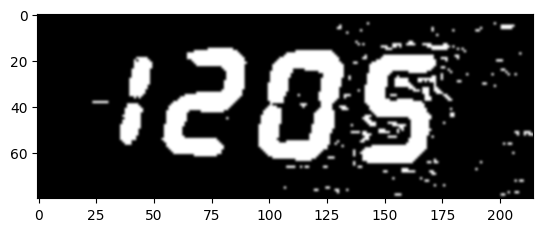

[[[[19, 9], [181, 9], [181, 75], [19, 75]], '205']]
46.25581395348837


In [18]:

for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    

In [21]:
prep.average_brightness(cv2.imread(red2))

32.939125

[]

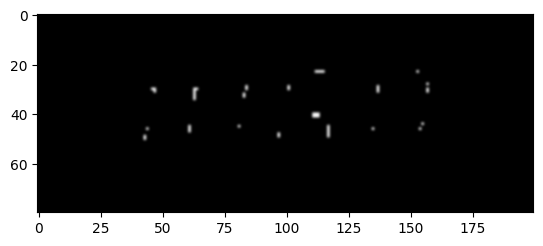

In [91]:
#Define the lower and upper bounds for the white color
# Since white is (255, 255, 255) in BGR, use a range close to it
# image = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/prediction_frames/2023-09-04_17:01:59_1078.png'
img = cv2.imread(test)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold_image = cv2.threshold(img, 235, 255, cv2.THRESH_BINARY)
# scale_factor = 3
# new_width = int(img.shape[1] * scale_factor)
# new_height = int(img.shape[0] * scale_factor)
plt.imshow(threshold_image, cmap = 'gray', interpolation = 'bicubic')
upscaled_image = cv2.resize(threshold_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
# crop = img[545:635, 770:1020]
# plt.imshow(crop, cmap = 'gray', interpolation = 'bicubic')
ocr = reader.readtext(threshold_image, allowlist='0123456789', paragraph = True)
ocr

In [90]:
test = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/cropped_datetime/2023-09-04_17:01:59.png'

In [12]:
red0 = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/cropped_datetime/2023-09-04_17:01:59.png'
redb = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/cropped_datetime/2023-09-04_17:40:45.png'
whiteb = '/home/jessica/reading-kiln-termostat/data/processed_recordings/29-08-2023-esmalte/prediction_frames/2023-08-29_17:22:32_1201.png'
white0 = '/home/jessica/reading-kiln-termostat/data/processed_recordings/01-08-2024-esmalte/prediction_frames/2024-08-01_22:26:00_1158.png'
red2 = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/cropped_datetime/2023-09-04_17:02:59.png'

In [5]:
def prepimage(image):
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate the average brightness by taking the mean of the grayscale pixel values
    average_brightness_value = np.mean(grayscale)
    print(average_brightness_value)
    _, threshold_image = cv2.threshold(image, 235, 255, cv2.THRESH_BINARY)
    plt.imshow(threshold_image, cmap = 'gray', interpolation = 'bicubic')
    return threshold_image

In [42]:
cv2.imread(red0).shape

(80, 200, 3)

79.3475


[([[68, 12], [168, 12], [168, 68], [68, 68]], '138', 0.5699179988121702)]

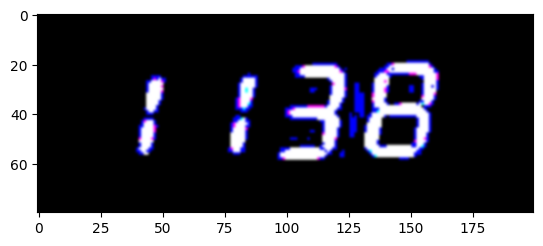

In [6]:
reader.readtext(prepimage(cv2.imread(redb)))

34.2610625


[([[32, 13], [168, 13], [168, 70], [32, 70]], '1080', 0.22875402867794037)]

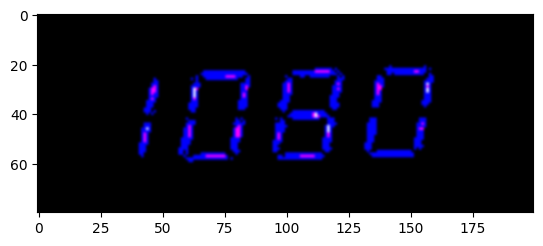

In [7]:
reader.readtext(prepimage(cv2.imread(red0)))

110.88493333333334


[([[49, 13], [203, 13], [203, 81], [49, 81]], '1158', 0.6847197413444519)]

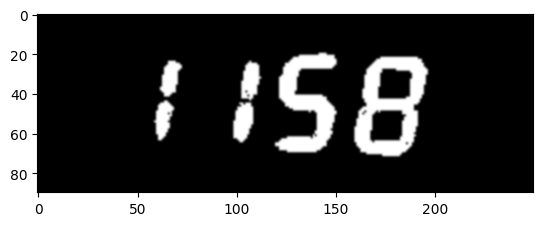

In [60]:
reader.readtext(prepimage(cv2.imread(white0)))

174.34118055555555


[([[13, 9], [155, 9], [155, 74], [13, 74]], '120 !', 0.7803422590412588)]

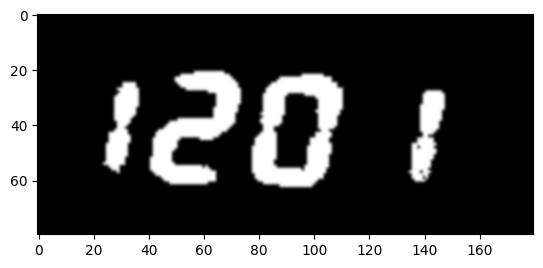

In [63]:
reader.readtext(prepimage(cv2.imread(whiteb)))

In [5]:
reader.readtext(prepimage(cv2.imread(red2)))

NameError: name 'prepimage' is not defined

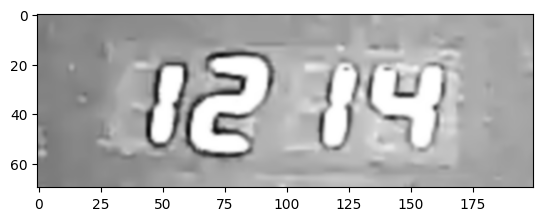

In [13]:
img = cv2.imread('/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/frames/23_120.png')
plt.imshow(img[760:830, 1020:1220], cmap = 'gray', interpolation = 'bicubic')


In [ ]:
def find_bounding_box(image):
    ocr = reader.readtext(img)

In [13]:
img = '/home/jessica/reading-kiln-termostat/data/processed_recordings/29-08-2024-esmalte/frames/86_180.png'
img = cv2.imread(img)
ocr = reader.readtext(img)
ocr

[([[45, 49], [293, 49], [293, 93], [45, 93]],
  '2024-08-29',
  0.4471183194021304),
 ([[309, 49], [509, 49], [509, 93], [309, 93]],
  '22: 33:56',
  0.9804873755573716),
 ([[856, 476], [994, 476], [994, 550], [856, 550]],
  "'858",
  0.3442777097225189),
 ([[876, 566], [966, 566], [966, 622], [876, 622]],
  '98 1',
  0.19430155302102273),
 ([[636, 646], [796, 646], [796, 724], [636, 724]],
  'STEcvo',
  0.36028594423792515),
 ([[1135, 705], [1217, 705], [1217, 767], [1135, 767]],
  'SS',
  0.9800585455711333)]

[([[11, 9], [180, 9], [180, 72], [11, 72]], '44a95', 0.17175045296363428)]

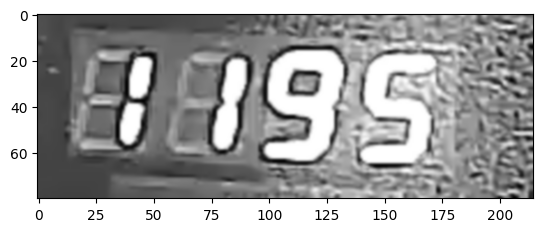

In [30]:
img = cv2.imread('/home/jessica/reading-kiln-termostat/data/processed_recordings/16-04-2024-esmalte/frames/16_60.png')
cropped = img[510:590, 920:1135]
plt.imshow(cropped, cmap = 'gray', interpolation = 'bicubic')
-25, +20, -30, +30
ocr = reader.readtext(cropped)
ocr

[[[[46, 10], [206, 10], [206, 82], [46, 82]], '1284']]

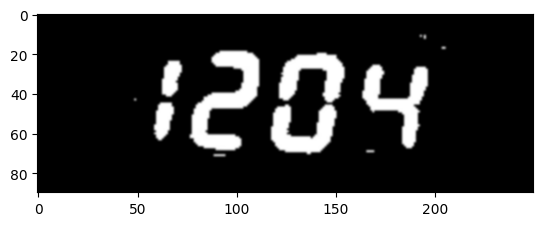

In [64]:
img = cv2.imread(image)
img = white_mask(img)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
ocr = reader.readtext(img, allowlist='0123456789', paragraph = True)
ocr